In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
import os
#from pandas_profiling import ProfileReport
from pylab import *

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import sem
from numpy.random import seed
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000

#figure(figsize=(1,1))

In [3]:
def generate_profile(df):
    '''generate pandas profile'''
 
    profile = ProfileReport(df)   
    profile.to_widgets()
    
    

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    return x, y

In [5]:
df = pd.read_csv('D:\cap\capstone2\data\interim\eda.csv', low_memory=False, index_col=None)

In [6]:
cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE', 'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI',
        'INSTRUCT_IAIR', 'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE', 'ACTU-INST', 'ACTU-IRCV',
        'ACTU-L24H', 'ACTU-L30D', 'ACTU-L90D', 'ACTU-PIC', 'ACTU-TOTL', 'ALL-INSTRUM', 'ALL-IRCV', 'ALL-L24H', 'ALL-L30D',
        'ALL-L90D', 'ALL-PIC', 'ALL-TOTL', 'GLDR-INSTRUCT', 'GLDR-IRCV', 'GLDR-L24H', 'GLDR-L30D', 'GLDR-L90D',
        'GLDR-PIC', 'GLDR-TOTL', 'MAKE-INSTRUCT', 'MAKE-IRCV', 'MAKE-L24H', 'MAKE-L30D', 'MAKE-L90D', 'MAKE-PIC',
        'MAKE-TOTL', 'MENG-INSTRUCT', 'MENG-IRCV', 'MENG-L24H', 'MENG-L30D', 'MENG-L90D', 'MENG-PIC', 'MENG-TOTL',
        'NGHT-INSTRUCT', 'NGHT-IRCV', 'NGHT-L24H', 'NGHT-L30D', 'NGHT-L90D', 'NGHT-PIC', 'NGHT-TOTL', 'SENG-INSTRUCT',
        'SENG-IRCV', 'SENG-L24H', 'SENG-L30D', 'SENG-L90D', 'SENG-PIC', 'SENG-TOTL', 'SIMU-TOTL']

In [7]:
def filler(col):
    df[col] = df[col].fillna(0)
    
for c in cols:
    filler(c)

In [8]:
int_cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE', 'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI',
        'INSTRUCT_IAIR', 'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE']

In [9]:
def integer(col):
    df[col] = df[col].astype(int)

In [10]:
integer(int_cols)

In [11]:
#generate_profile(df)

In [12]:
df.head(3)

,idx,event_cause,Unnamed: 0,ev_id,ac_key,find_key,far_part,second_pilot,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,ev_country,light_cond,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FE,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_RMPT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTR_GYRO,INSTR_HELI,INSTRUCT_IAIR,INSTR_IHEL,INSTR_PLFT,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,0,Personnel-Decision making/judgment,0,20001208X08803,20001208X088031,20001208X0880311,91,N,PILOT,46,M,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0,0,0,0,0.0,0,0,1,0,0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Enviro-Ceiling/visibility/precip,1,20001208X08803,20001208X088031,20001208X0880312,91,N,PILOT,46,M,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0,0,0,0,0.0,0,0,1,0,0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Enviro-Ceiling/visibility/precip,2,20001208X08803,20001208X088031,20001208X0880313,91,N,PILOT,46,M,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0,0,0,0,0.0,0,0,1,0,0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.drop('idx', axis=1, inplace=True)

D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


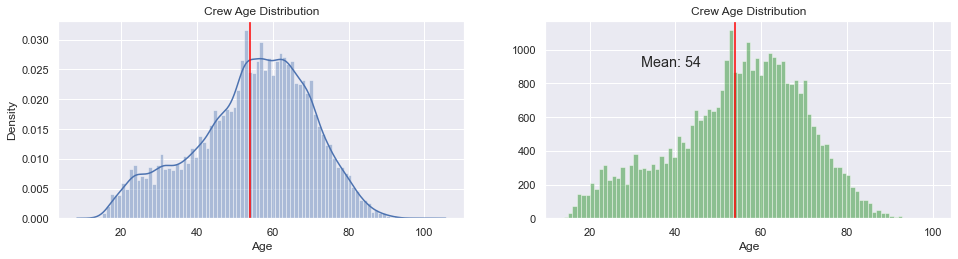

In [14]:
age_u = int(df.crew_age.mean())

sns.set(rc={"figure.figsize": (16, 8)})
plt.title('Crew Age Distribution')
subplot(2,2,1)
ax = sns.distplot(df.crew_age, bins=85, axlabel="Age")
plt.axvline(age_u , color='red')
plt.title('Crew Age Distribution')

subplot(2,2,2)
ax = sns.distplot(df.crew_age, bins=85, kde=False, color='green', axlabel='Age')
plt.axvline(age_u , color='red')
plt.title('Crew Age Distribution')
plt.text(32,900, 'Mean: ' + str(age_u), size='large')

plt.show()


In [15]:
df.crew_age.describe()

count    34900.000000
mean        54.635215
std         15.229651
min         14.000000
25%         45.000000
50%         56.000000
75%         66.000000
max        100.000000
Name: crew_age, dtype: float64

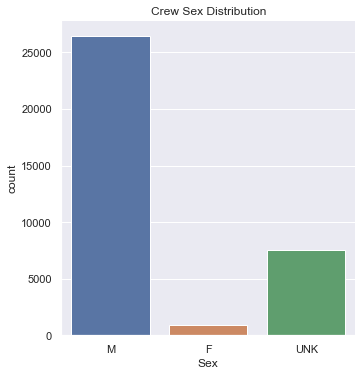

In [16]:
sns.catplot(x="crew_sex", kind="count",  data=df)
plt.title('Crew Sex Distribution')
plt.xlabel("Sex")
plt.show()

In [17]:
df.crew_sex.value_counts()

M      26478
UNK     7503
F        919
Name: crew_sex, dtype: int64

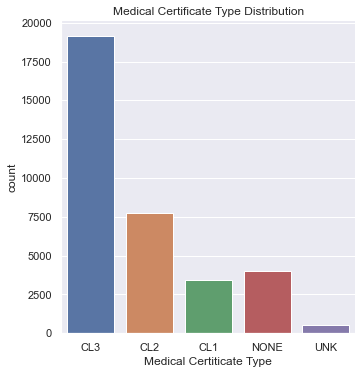

In [18]:
sns.catplot(x="med_certf", kind="count",  data=df)
plt.title('Medical Certificate Type Distribution')
plt.xlabel("Medical Certiticate Type")
plt.show()

In [19]:
df.med_certf.value_counts()

CL3     19146
CL2      7758
NONE     4029
CL1      3440
UNK       527
Name: med_certf, dtype: int64

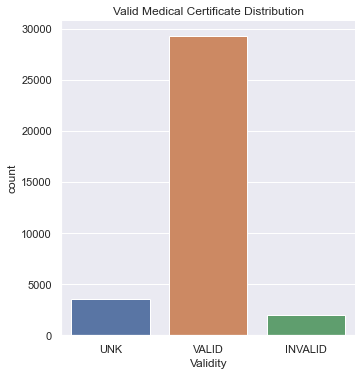

In [20]:
sns.catplot(x="med_crtf_vldty", kind="count",  data=df)
plt.title('Valid Medical Certificate Distribution')
plt.xlabel("Validity")
plt.show()

In [21]:
df.med_crtf_vldty.value_counts()

VALID      29308
UNK         3591
INVALID     2001
Name: med_crtf_vldty, dtype: int64

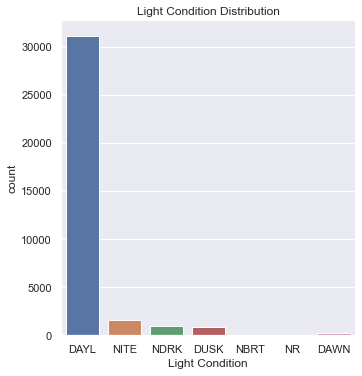

In [22]:
sns.catplot(x="light_cond", kind="count",  data=df)
plt.title('Light Condition Distribution')
plt.xlabel("Light Condition")
plt.show()

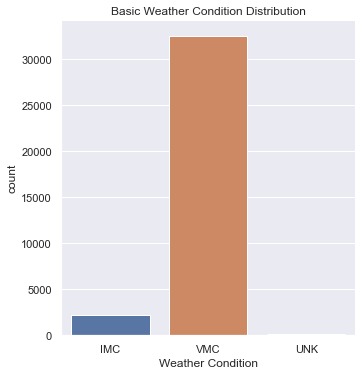

In [23]:
sns.catplot(x="wx_cond_basic", kind="count",  data=df)
plt.title('Basic Weather Condition Distribution')
plt.xlabel("Weather Condition")
plt.show()

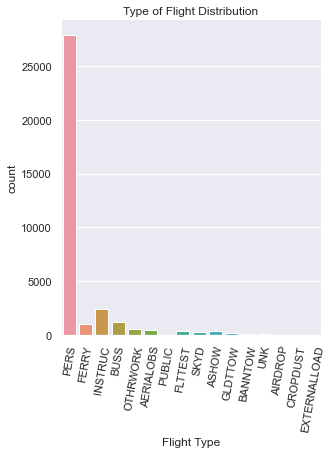

In [24]:
chart = sns.catplot(x="type_fly", kind="count",  data=df)
chart.set_xticklabels(rotation=80)
plt.title('Type of Flight Distribution')
plt.xlabel("Flight Type")
plt.show()

In [25]:
df.type_fly.value_counts()

PERS            27835
INSTRUC          2392
BUSS             1182
FERRY            1032
OTHRWORK          525
AERIALOBS         502
FLTTEST           391
ASHOW             334
SKYD              245
GLDTTOW           178
BANNTOW           134
UNK                54
PUBLIC             44
CROPDUST           21
AIRDROP            14
EXTERNALLOAD       12
Name: type_fly, dtype: int64

## Pilot Certificate Analysis

In [26]:
pilot_cert_cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE']

pilot_cert = df[pilot_cert_cols]
pilot_cert.sample(5)

,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE
15671,0,0,0,0,0,0,1,0,0,0
12725,0,0,0,0,0,0,1,0,0,0
25914,0,0,0,0,0,0,1,0,0,0
277,0,0,0,1,0,0,0,0,0,0
18113,0,0,0,0,0,0,1,0,0,0


In [27]:
pilot_cert["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']
print('over 1', sum(pilot_cert['result'] > 1))
print('over 2', sum(pilot_cert['result'] >= 2))
print('over 3', sum(pilot_cert['result'] >= 3))
print('over 4', sum(pilot_cert['result'] >= 4))


over 1 3121
over 2 3121
over 3 200
over 4 5


<ipython-input-27-6dc0af63c239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pilot_cert["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']


There appears to be some conflicting entries a number of this certificates cannot be held at the same time as one is a higher level that replaces the next lower certificate.

TASK: Run code to retain only the highest certificate level

In [28]:
ATP = df.columns.get_loc('CERT_ATP')
COMM = df.columns.get_loc('CERT_COMM')
PRI = df.columns.get_loc('CERT_PRI')
REC = df.columns.get_loc('CERT_REC')
SPRT = df.columns.get_loc('CERT_SPRT')
STU = df.columns.get_loc('CERT_STU')
NONE = df.columns.get_loc('CERT_NONE')

In [29]:
for i in range(len(df)):
    if df.iloc[i, ATP] == 1:
        df.iloc[i, COMM] = 0
        df.iloc[i, PRI] = 0
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif df.iloc[i, COMM] == 1:
        df.iloc[i, PRI] = 0
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif df.iloc[i, PRI] == 1:
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif ((df.iloc[i, REC] == 1) | (df.iloc[i, SPRT] == 1)):
        df.iloc[i, STU] = 0
        
    if (df.iloc[i, ATP] == 0) & (df.iloc[i, COMM] == 0)  &  (df.iloc[i, PRI] == 0) & (df.iloc[i, REC] == 0) & (df.iloc[i, SPRT] == 0) & (df.iloc[i, STU] == 0):
        df.iloc[i, NONE] = 1
        

In [30]:
df["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']
print('over 1', sum(df['result'] > 1))
print('over 2', sum(df['result'] >= 2))
print('over 3', sum(df['result'] >= 3))
print('over 4', sum(df['result'] >= 4))

over 1 12
over 2 12
over 3 0
over 4 0


The 12 record with double entries are acceptable as these are sport and recreational certificates.

### TASK - CREATE PILOT CERTIFICATION FEATURE

In [31]:
#use colum indexes previously generated

df['pilot_privileges'] = ""

priv = df.columns.get_loc('pilot_privileges')
for i in range(len(df)):
    if df.iloc[i, ATP] == 1:
        df.iloc[i, priv] = 'ATP'
    elif df.iloc[i, COMM] == 1:
        df.iloc[i, priv] = 'COMMERCIAL'
    elif df.iloc[i, PRI] == 1:
        df.iloc[i, priv] = 'PRIVATE'
    elif df.iloc[i, REC] == 1:
        df.iloc[i, priv] = 'SPRT/REC'
    elif df.iloc[i, SPRT] == 1:
        df.iloc[i, priv] = 'SPRT/REC'
    elif df.iloc[i, STU] == 1:
        df.iloc[i, priv] = 'STUDENT'
    elif df.iloc[i, NONE] == 1:
        df.iloc[i, priv] = 'NONE'

In [32]:
print(df.columns)

Index(['event_cause', 'Unnamed: 0', 'ev_id', 'ac_key', 'find_key', 'far_part',
       'second_pilot', 'crew_category', 'crew_age', 'crew_sex',
       ...
       'SENG-TOTL', 'SIMU-INST', 'SIMU-IRCV', 'SIMU-L24H', 'SIMU-L30D',
       'SIMU-L90D', 'SIMU-PIC', 'SIMU-TOTL', 'result', 'pilot_privileges'],
      dtype='object', length=131)


In [33]:
to_drop = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT','CERT_NONE', 'result',
          'GLDR-INSTRUCT', 'GLDR-IRCV', 'GLDR-L24H', 'GLDR-L30D', 'GLDR-L90D', 'GLDR-PIC','GLDR-TOTL',]
df.drop(to_drop, axis=1, inplace=True)

In [34]:
popped = df.pop('pilot_privileges')
df.insert(10, 'pilot_privileges', popped)

In [35]:
df.head()

,event_cause,Unnamed: 0,ev_id,ac_key,find_key,far_part,second_pilot,crew_category,crew_age,crew_sex,pilot_privileges,med_certf,med_crtf_vldty,ev_country,light_cond,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_FE,CERT_FORN,CERT_MIL,CERT_RMPT,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTR_GYRO,INSTR_HELI,INSTRUCT_IAIR,INSTR_IHEL,INSTR_PLFT,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,Personnel-Decision making/judgment,0,20001208X08803,20001208X088031,20001208X0880311,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Enviro-Ceiling/visibility/precip,1,20001208X08803,20001208X088031,20001208X0880312,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Enviro-Ceiling/visibility/precip,2,20001208X08803,20001208X088031,20001208X0880313,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aircraft oper/perf/capability-Altitude,3,20001208X08803,20001208X088031,20001208X0880314,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aircraft oper/perf/capability-(general),4,20001208X08803,20001208X088031,20001208X0880315,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Check airplane certs for consistency

In [36]:
ap = df.loc[:,'AP_MEL':'AP_NONE']
ap['result'] = ap['AP_MEL'] + ap['AP_MES'] + ap['AP_SEL'] + ap['AP_SES']


In [37]:
fix = ap[(ap['AP_NONE'] == 1) & (ap['result'] >= 1)]

In [38]:
fix.shape

(0, 6)

Airplane certifications appear consistent.

#### Check Instructor Certification for consistency

In [39]:
Inst = df.loc[:,'INSTRUCT_AME':'INSTRUCT_NONE']
Inst['result'] = Inst['INSTRUCT_AME'] + Inst['INSTRUCT_ASE'] + Inst['INSTRUCT_GLI'] + Inst['INSTRUCT_IAIR'] + Inst['INSTRUCT_SPRT']

In [40]:
fix = Inst[(Inst['INSTRUCT_NONE'] == 1) & (Inst['result'] >= 1)]

In [41]:
fix.shape

(0, 11)

Instructor Certifications appear consisitent

#### Check Intrument Rating for Consistency

In [42]:
I = Inst = df.loc[:,'INSTRUM_APLN':'INSTRUM_NONE']

In [43]:
fix = I[(I['INSTRUM_APLN'] == 1) & (I['INSTRUM_NONE'] == 1)]
fix.shape

(0, 4)

Instrument Certifications appear consisitent

#### IMPUTE TOTAL FLIGHT TIME WITH MAKE FLT TIME IF  MAKE FLT TIME IS LARGER

In [44]:
sense = df[df['MAKE-TOTL'] > df['ALL-TOTL']]
sense.shape

(247, 115)

In [45]:
make_idx = df.columns.get_loc('MAKE-TOTL')
all_idx = df.columns.get_loc('ALL-TOTL')

for i in range(len(df)):
    if df.iloc[i, make_idx] > df.iloc[i, all_idx]:
        df.iloc[i, all_idx] = df.iloc[i, make_idx]

In [46]:
sense = df[df['MAKE-TOTL'] > df['ALL-TOTL']]
sense.shape

(0, 115)

In [47]:
df.shape

(34900, 115)

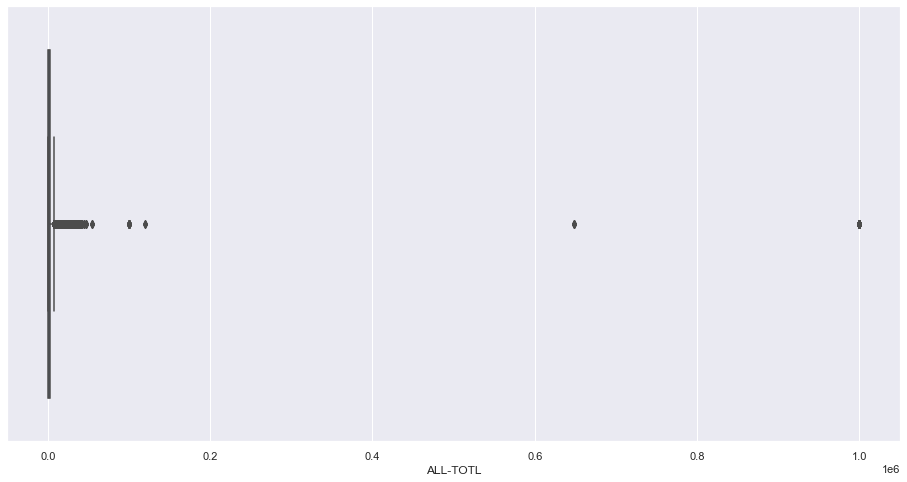

In [48]:
sns.boxplot(x=df['ALL-TOTL'])
plt.show()

#### Remove Outliers on the High end of Total Flight Time

In [49]:
Q1 = df['ALL-TOTL'].quantile(0.25)
Q3 = df['ALL-TOTL'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~(df['ALL-TOTL'] > (Q3 + 1.5 * IQR))]
df.shape

2749.5


(30774, 115)

#### Check for Privideges minimum Hours and impute minimums if not met

### ATP

In [50]:
low_atp = df[(df['pilot_privileges'] == 'ATP') & (df['ALL-TOTL'] < 1500)]
low_atp.shape

(107, 115)

In [51]:
def impute_time(priv, ALL, INSTRUM, PIC, NIGHT):
    ''' impute minimum times based on certificate held and its minimums'''
    
    #view number of troubled records
    low_atp = df[(df['pilot_privileges'] == priv) & (df['ALL-TOTL'] < ALL)]
    print(priv, " ", int(low_atp.shape[0]))
    
    
    all_idx = df.columns.get_loc('ALL-TOTL')
    pic_idx = df.columns.get_loc('ALL-PIC')
    intrum_idx = df.columns.get_loc('ALL-INSTRUM')
    priv_idx = df.columns.get_loc('pilot_privileges')
    night_idx = df.columns.get_loc('NGHT-TOTL')
    
    for i in range (len(df)):
        if (df.iloc[i, priv_idx] == priv):
            if df.iloc[i, all_idx] < ALL:
                df.iloc[i, all_idx] = ALL
            if df.iloc[i, pic_idx] < PIC:
                df.iloc[i, pic_idx] = PIC
            if df.iloc[i, intrum_idx] < INSTRUM:
                df.iloc[i, intrum_idx] = INSTRUM
            if df.iloc[i, night_idx] < NIGHT:
                df.iloc[i, night_idx] = NIGHT    
    
    #Chec trouble records left      
    low_atp = df[(df['pilot_privileges'] == priv) & (df['ALL-TOTL'] < ALL)]
    print('Fixed ', priv, " ", int(low_atp.shape[0]))      
            

In [52]:
impute_time ('ATP', 1500, 75, 250, 100)
impute_time ('COMMERCIAL', 250, 10, 100, 5)
impute_time ('PRIVATE', 50, 3, 15, 3)
impute_time ('SPRT/REC', 20, 0, 5, 0)

ATP   107


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  ATP   0
COMMERCIAL   301


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  COMMERCIAL   0
PRIVATE   512


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  PRIVATE   0
SPRT/REC   90


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  SPRT/REC   0


In [53]:
df.sample(5)

,event_cause,Unnamed: 0,ev_id,ac_key,find_key,far_part,second_pilot,crew_category,crew_age,crew_sex,pilot_privileges,med_certf,med_crtf_vldty,ev_country,light_cond,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_FE,CERT_FORN,CERT_MIL,CERT_RMPT,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTR_GYRO,INSTR_HELI,INSTRUCT_IAIR,INSTR_IHEL,INSTR_PLFT,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
22116,Enviro-Wind,30440,20150608X30936,20150608X309361,20150608X3093613,91,N,PILOT,73,UNK,PRIVATE,NONE,VALID,USA,DAYL,VMC,NONE,PERS,NaN,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22520,Personnel-Incorrect Action,31052,20150719X02305,20150719X023051,20150719X0230513,91,N,PILOT,31,M,PRIVATE,CL2,VALID,USA,DAYL,VMC,NONE,PERS,NaN,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,8.0,96.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,49.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,96.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
12347,Enviro-Temp/humidity/pressure,17102,20120324X70622,20120324X706221,20120324X7062212,91,N,PILOT,49,M,PRIVATE,CL3,VALID,USA,DAYL,VMC,NONE,PERS,NaN,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,3.0,401.0,434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,401.0,434.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
9974,Personnel-Incorrect Action,13916,20110624X10950,20110624X109501,20110624X1095012,91,N,PILOT,81,M,PRIVATE,CL3,VALID,USA,DAYL,VMC,NONE,PERS,NaN,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,956.0,932.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,932.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,956.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34641,Enviro-External Obstacle,47304,20191120X60315,20191120X603151,20191120X6031513,91,N,PILOT,67,M,PRIVATE,CL3,VALID,USA,DAYL,VMC,NONE,PERS,NaN,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,508.0,521.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,76.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,521.0,521.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df.to_csv('D:\cap\capstone2\data\interim\pre_mod.csv')

D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


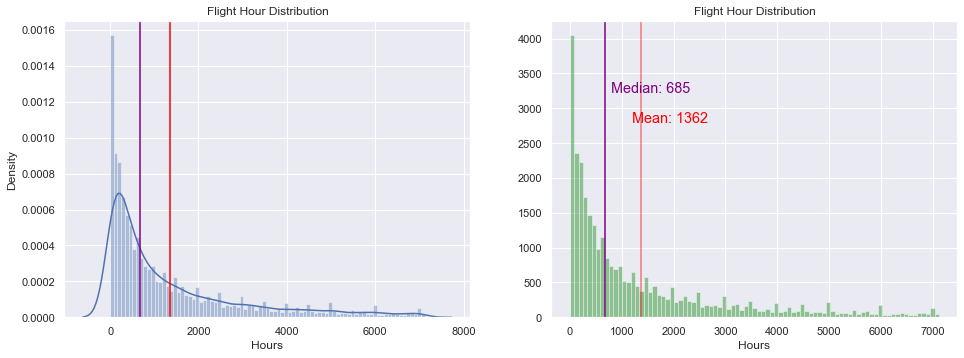

In [55]:
total_time_u = int(df['ALL-TOTL'].mean())
total_time_pm = int(df['ALL-TOTL'].median())

sns.set(rc={"figure.figsize": (16, 12)})
plt.title('Total Flight Hour Distribution')
subplot(2,2,1)
ax = sns.distplot(df['ALL-TOTL'], bins=85, axlabel="Hours")
plt.axvline(total_time_u, color='red')
plt.axvline(total_time_pm, color='purple')
plt.title('Flight Hour Distribution')

subplot(2,2,2)
ax = sns.distplot(df['ALL-TOTL'], bins=85, kde=False, color='green', axlabel='Hours')
plt.axvline(total_time_u, color='red', alpha = 0.5)
plt.title('Flight Hour Distribution')
plt.axvline(total_time_pm, color='purple')
plt.text(1200,2800, 'Mean: ' + str(total_time_u), size='large', color = 'red')
plt.text(800,3220, 'Median: ' + str(total_time_pm ), size='large', color='purple')
plt.show()

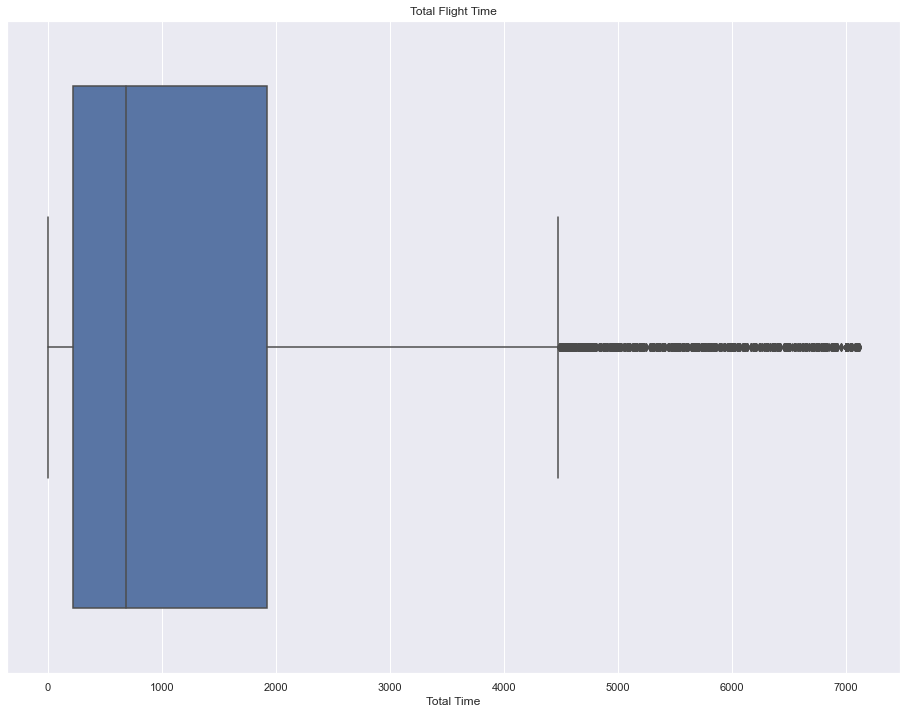

In [56]:
sns.boxplot(x=df['ALL-TOTL'])
plt.title('Total Flight Time')
plt.xlabel('Total Time')
plt.show()

In [57]:
events = df.event_cause.value_counts()
events.to_csv('D:\cap\capstone2\data\interim\cause_count.csv')
events

Personnel-Aircraft control                                                     4390
Aircraft oper/perf/capability-Directional control                              1873
Enviro-Wind                                                                    1842
Enviro-External Obstacle                                                       1840
Personnel-Incorrect Action                                                     1734
Personnel-Decision making/judgment                                             1318
Fluids/misc hardware-Fuel                                                       838
Aircraft oper/perf/capability-Airspeed                                          818
Enviro-Terrain                                                                  813
Aircraft oper/perf/capability-(general)                                         739
Personnel-Monitoring other aircraft                                             722
Aircraft oper/perf/capability-Landing flare                                 

In [58]:
top_5 = ['Personnel-Aircraft control', 'Aircraft oper/perf/capability-Directional control',                          
         'Enviro-Wind', 'Enviro-External Obstacle','Personnel-Incorrect Action']

In [59]:
df_top = df[df.event_cause.isin(top_5)]
df_top.shape

(11679, 115)

### TOTAL FLIGHT TIME

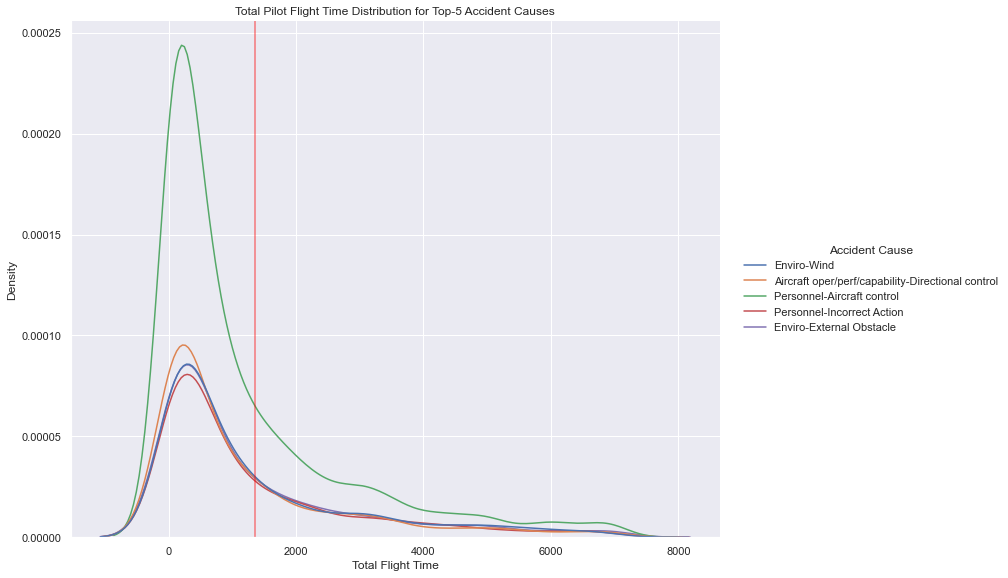

In [60]:
g = sns.displot(df_top, x='ALL-TOTL', hue='event_cause', kind='kde', height=8, aspect=1.3)
g._legend.set_title('Accident Cause')
plt.xlabel('Total Flight Time')
plt.title('Total Pilot Flight Time Distribution for Top-5 Accident Causes')
plt.axvline(total_time_u, color='red', alpha = 0.5)
plt.show()

In [61]:
u = int(df['ALL-TOTL'].mean())
print("POP MEAN: ", str(u))

m = int(df['ALL-TOTL'].median())
print("POP MEDIAN: ", str(m))

o = int(np.std(df['ALL-TOTL']))
print('POP STD: ', o)

POP MEAN:  1362
POP MEDIAN:  685
POP STD:  1616


In [62]:
causes = {}
cause_counts = df['event_cause'].value_counts().to_dict()
for k, val in cause_counts.items():
    #include only incidents with at least 75 data points
    if val > 75: 
        causes[k] = val

In [63]:
diff_means = {}
i = 0 
for c in causes:
    temp_df = df[df['event_cause'] == c]
    mean = int(temp_df['ALL-TOTL'].mean())
    median = int(temp_df['ALL-TOTL'].median())
    diff_means[i] = [c, mean, median]  
    i = i+1

In [64]:
mean_diff = pd.DataFrame.from_dict(diff_means, orient='index')
mean_diff.columns = ['cause', 'mean', 'median']
mean_diff['pop_mean'] = u
mean_diff['pop_median'] = m
mean_diff['diff_mean'] = mean_diff['mean'] - mean_diff['pop_mean']
mean_diff['diff_median'] = mean_diff['median'] - mean_diff['pop_median']
mean_diff = mean_diff [['cause', 'pop_mean', 'mean', 'diff_mean', 'pop_median', 'median', 'diff_median']]
sorted_mean = mean_diff.sort_values('diff_mean', ascending=False)
sorted_mean.head(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
29,Aircraft systems-Gear extension and retract sys,1362,1870,508,685,1482,797
24,Personnel-Non-Compliace with Guidance,1362,1844,482,685,1092,407
39,Aircraft power plant-Fuel,1362,1810,448,685,1000,315


In [65]:
sorted_mean.tail(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
19,Personnel-Limited Experience for Conditions,1362,689,-673,685,275,-410
11,Aircraft oper/perf/capability-Landing flare,1362,683,-679,685,187,-498
30,Personnel-Qualification/certification,1362,518,-844,685,95,-590


In [66]:
sorted_median = mean_diff.sort_values('diff_median', ascending=False)
sorted_median.head(5)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
29,Aircraft systems-Gear extension and retract sys,1362,1870,508,685,1482,797
57,Personnel-AC Modification/Repair,1362,1743,381,685,1154,469
48,Aircraft power plant-Recip engine power section,1362,1764,402,685,1100,415
24,Personnel-Non-Compliace with Guidance,1362,1844,482,685,1092,407
42,Personnel-Installation,1362,1803,441,685,1091,406


In [67]:
sorted_median.tail(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
19,Personnel-Limited Experience for Conditions,1362,689,-673,685,275,-410
11,Aircraft oper/perf/capability-Landing flare,1362,683,-679,685,187,-498
30,Personnel-Qualification/certification,1362,518,-844,685,95,-590


In [68]:
item1 = sorted_mean.iloc[0,0]
item2 = sorted_mean.iloc[-1,0]
print(item1)
print(item2)
causer1 = df[df['event_cause']==item1]
causer2 = df[df['event_cause']==item2]

Aircraft systems-Gear extension and retract sys
Personnel-Qualification/certification


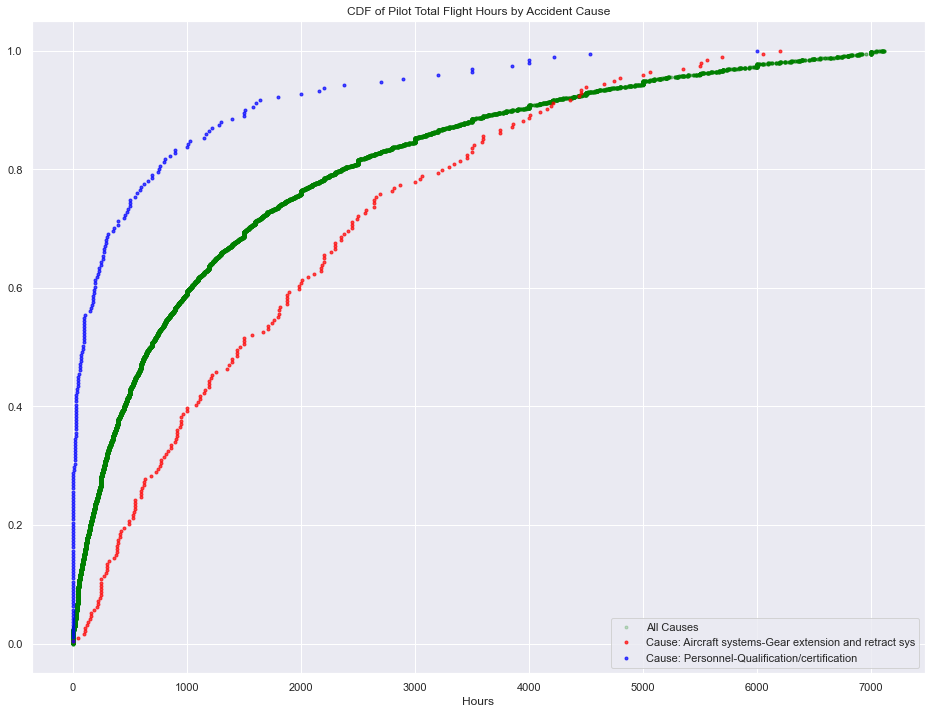

In [69]:
x_pop, y_pop = ecdf(df['ALL-TOTL'])
x_cause1, y_cause1 = ecdf(causer1['ALL-TOTL'])
x_cause2, y_cause2 = ecdf(causer2['ALL-TOTL'])
plt.plot(x_pop, y_pop, marker = '.', linestyle = 'none', color='green', alpha=0.2, label = 'All Causes')
plt.plot(x_cause1, y_cause1, marker = '.', linestyle = 'none', color='red', alpha=0.7, label = 'Cause: ' + item1)
plt.plot(x_cause2, y_cause2, marker = '.', linestyle = 'none', color='blue', alpha=0.7, label = 'Cause: ' + item2)
plt.legend(loc='lower right')
plt.title('CDF of Pilot Total Flight Hours by Accident Cause')
plt.xlabel('Hours')
plt.show()

In [70]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [71]:
def bootstrapper (item, data, func, func_name='***', size=10000):
    cause_reps = draw_bs_reps(data1, func, size)
    sem = np.std(data) / np.sqrt(len(data))
    print ('SEM: ', str(round(sem,2)))
    bs_std = np.std(cause_reps)
    print('STD: ' + str(round(bs_std,2)) ) 
    plt.hist(cause_reps, bins=50, density=True)
    plt.xlabel('Bootstraped ' + func_name + ' for Cause: ' + item)
    plt.ylabel('PDF')
    plt.show()
    
    return cause_reps

Aircraft systems-Gear extension and retract sys
SEM:  107.59
STD: 107.68


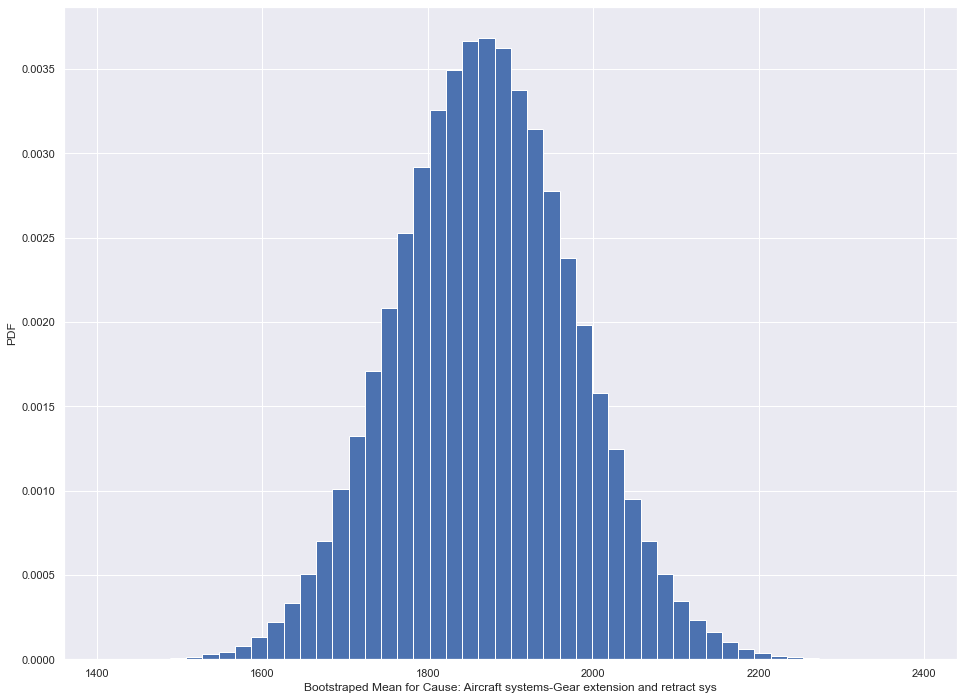

500000


In [72]:
print(item1)
data1 = df[df['event_cause'] == item1]['ALL-TOTL']
name = 'Mean'
a = bootstrapper(item1, data1, np.mean, name, 500000)
print(len(a))

Personnel-Qualification/certification
SEM:  70.94
STD: 107.42


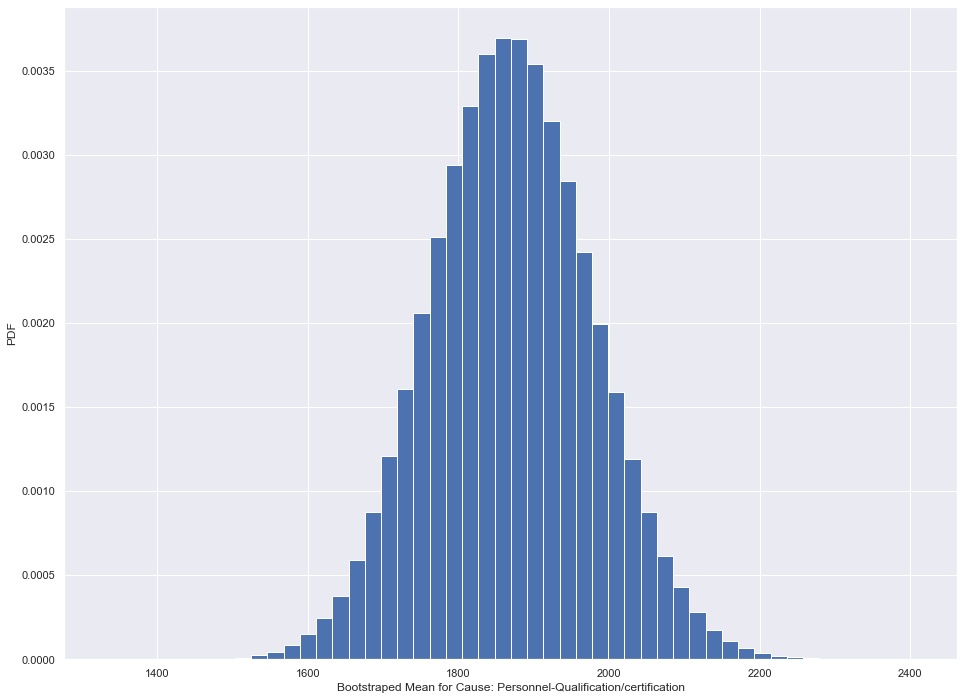

500000


In [73]:
print(item2)
data2 = df[df['event_cause'] == item2]['ALL-TOTL']
name = 'Mean'
b = bootstrapper(item2, data2, np.mean, name, 500000)
print(len(b))

## Hypothesis Testing

#### Null Hypothesis - There is not difference in mean total flight time between pilots involved in different accident causes.

#### Alternate Hypothesis - There is a difference in mean total flight time between pilots involved in different accident causes.

In [74]:
t, p = ttest_ind(a,b)
print('t-statistic: ' + str(round(t,2)))
print('p-value: ' + str(round(p,3)))

t-statistic: -1.56
p-value: 0.118


### Conclusion: with an alpha of 0.05 and a p-value of 0.118 the Null Hypothesis cannot be rejected. There is little to no difference in the mean total flight time between pilots involved in different accident causes.

# ____________________________________________________________

# CREW AGE

D:\Anaconda\envs\Capstone2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Crew Age Distribution')

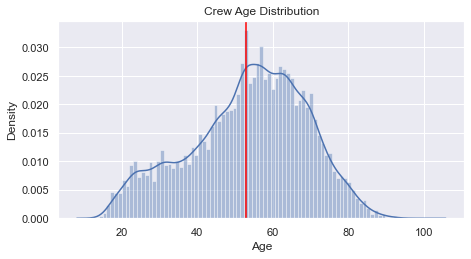

In [75]:
age_u = int(df.crew_age.mean())

sns.set(rc={"figure.figsize": (16, 8)})
plt.title('Crew Age Distribution')
subplot(2,2,1)
ax = sns.distplot(df.crew_age, bins=85, axlabel="Age")
plt.axvline(age_u , color='red')
plt.title('Crew Age Distribution')


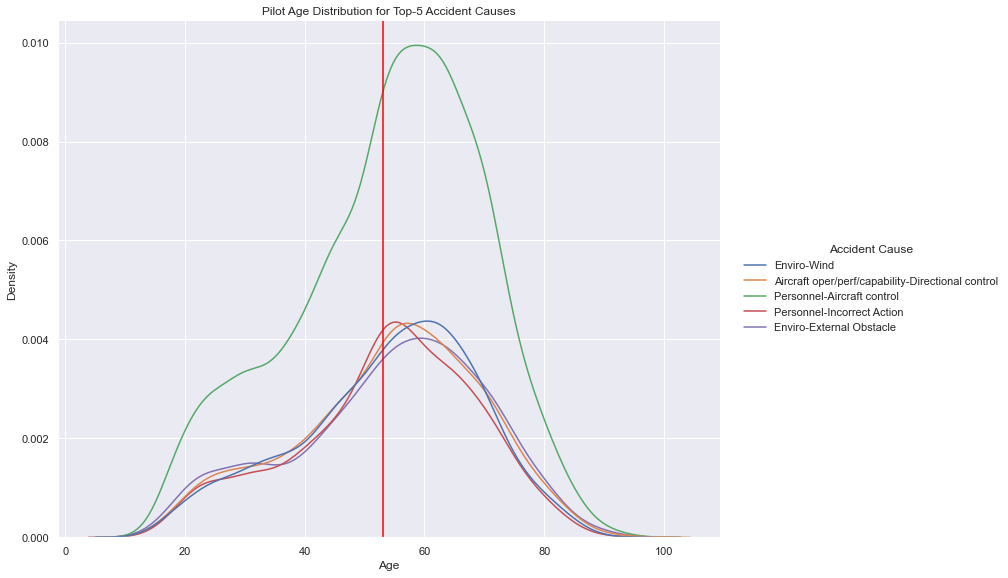

In [76]:
g = sns.displot(df_top, x='crew_age', hue='event_cause', kind='kde', height=8, aspect=1.3)
g._legend.set_title('Accident Cause')
plt.xlabel('Age')
plt.title('Pilot Age Distribution for Top-5 Accident Causes')
plt.axvline(age_u , color='red')
plt.show()

In [77]:
u = int(df['crew_age'].mean())
print("POP MEAN: ", str(u))

m = int(df['crew_age'].median())
print("POP MEDIAN: ", str(m))

o = int(np.std(df['crew_age']))
print('POP STD: ', o)

POP MEAN:  53
POP MEDIAN:  55
POP STD:  15


In [78]:
causes = {}
cause_counts = df['event_cause'].value_counts().to_dict()
for k, val in cause_counts.items():
    #include only incidents with at least 75 data points
    if val > 75: 
        causes[k] = val

In [79]:
#causes = list(df['event_cause'].unique())
diff_means = {}
i = 0 
for c in causes:
    temp_df = df[df['event_cause'] == c]
    mean = int(temp_df['crew_age'].mean())
    median = int(temp_df['crew_age'].median())
    diff_means[i] = [c, mean, median]  
    i = i+1

In [80]:
mean_diff = pd.DataFrame.from_dict(diff_means, orient='index')
mean_diff.columns = ['cause', 'mean', 'median']
mean_diff['pop_mean'] = u
mean_diff['pop_median'] = m
mean_diff['diff_mean'] = mean_diff['mean'] - mean_diff['pop_mean']
mean_diff['diff_median'] = mean_diff['median'] - mean_diff['pop_median']
mean_diff = mean_diff [['cause', 'pop_mean', 'mean', 'diff_mean', 'pop_median', 'median', 'diff_median']]
sorted_mean = mean_diff.sort_values('diff_mean', ascending=False)
sorted_mean.head(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
18,Aircraft oper/perf/capability-Descent/approach...,53,58,5,55,59,4
47,Personnel-Attention,53,57,4,55,61,6
49,Personnel-Flight planning/navigation,53,55,2,55,57,2


In [81]:
sorted_mean.tail(3)

,cause,pop_mean,mean,diff_mean,pop_median,median,diff_median
22,Personnel-Fuel planning,53,51,-2,55,53,-2
31,Aircraft oper/perf/capability-Climb capability,53,50,-3,55,52,-3
58,Personnel-Communication Hyndered,53,50,-3,55,51,-4


In [82]:
item1 = sorted_mean.iloc[0,0]
item2 = sorted_mean.iloc[-1,0]
print(item1)
print(item2)
causer1 = df[df['event_cause']==item1]
causer2 = df[df['event_cause']==item2]

Aircraft oper/perf/capability-Descent/approach/glide path
Personnel-Communication Hyndered


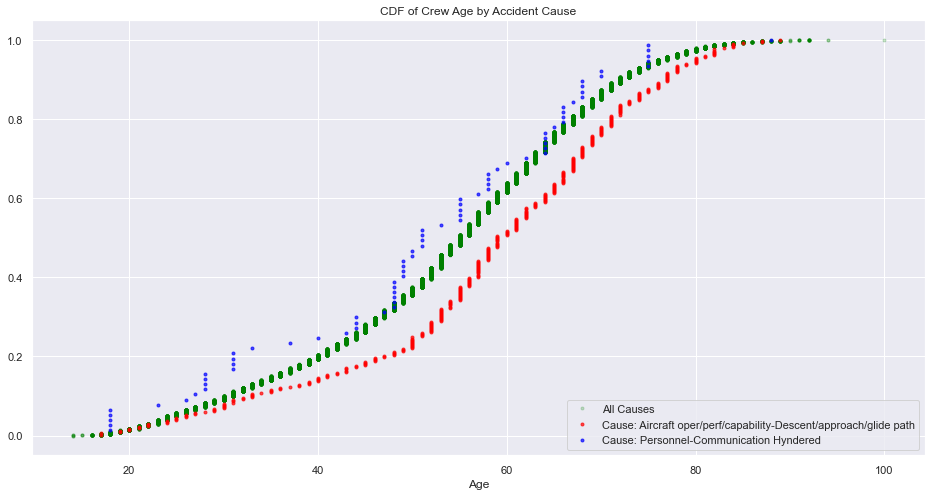

In [83]:
x_pop, y_pop = ecdf(df['crew_age'])
x_cause1, y_cause1 = ecdf(causer1['crew_age'])
x_cause2, y_cause2 = ecdf(causer2['crew_age'])
plt.plot(x_pop, y_pop, marker = '.', linestyle = 'none', color='green', alpha=0.2, label = 'All Causes')
plt.plot(x_cause1, y_cause1, marker = '.', linestyle = 'none', color='red', alpha=0.7, label = 'Cause: ' + item1)
plt.plot(x_cause2, y_cause2, marker = '.', linestyle = 'none', color='blue', alpha=0.7, label = 'Cause: ' + item2)
plt.legend(loc='lower right')
plt.title('CDF of Crew Age by Accident Cause')
plt.xlabel('Age')
plt.show()

Aircraft oper/perf/capability-Descent/approach/glide path
SEM:  0.79
STD: 0.79


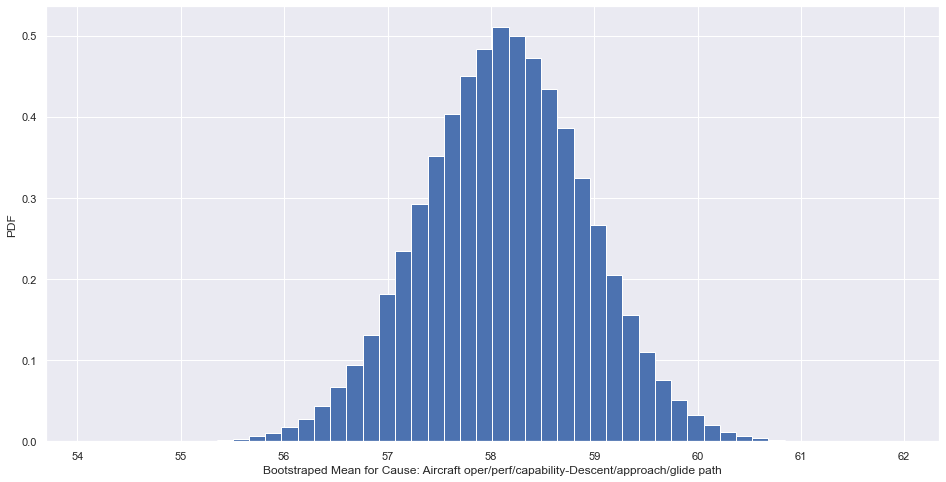

500000


In [84]:
print(item1)
data1 = df[df['event_cause'] == item1]['crew_age']
name = 'Mean'
a = bootstrapper(item1, data1, np.mean, name, 500000)
print(len(a))

Personnel-Communication Hyndered
SEM:  1.88
STD: 0.79


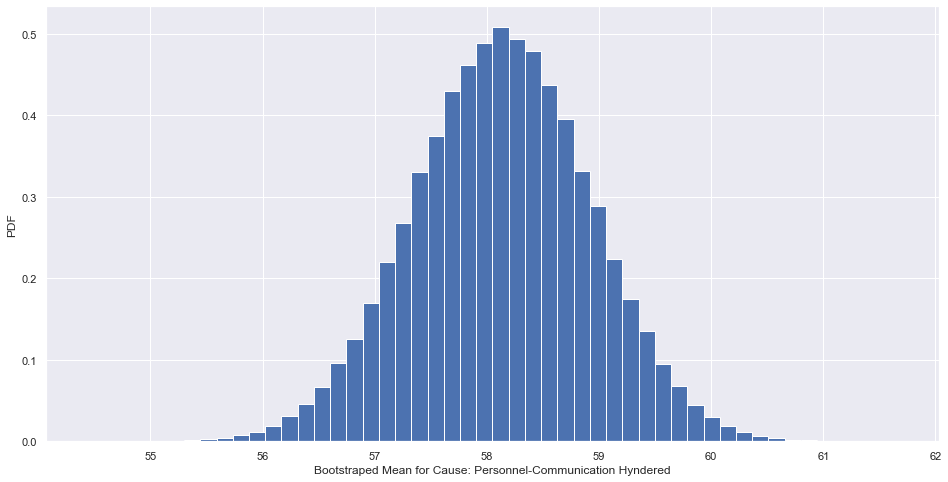

500000


In [85]:
print(item2)
data2 = df[df['event_cause'] == item2]['crew_age']
name = 'Mean'
b = bootstrapper(item2, data2, np.mean, name, 500000)
print(len(b))


## Hypothesis Testing

#### Null Hypothesis - There is not difference in age between pilots involved in different accident causes.

#### Alternate Hypothesis - There is a difference in age between pilots involved in different accident causes.

In [86]:
t, p = ttest_ind(a,b)
print('t-statistic: ' + str(round(t,2)))
print('p-value: ' + str(round(p,2)))

t-statistic: -0.25
p-value: 0.81


### Conclusion: with an alpha of 0.05 and a p-value of 0.81 the Null Hypothesis cannot be rejected. There is little to no difference in the mean total flight time between pilots involved in different accident causes.

# Pilot Priviledge

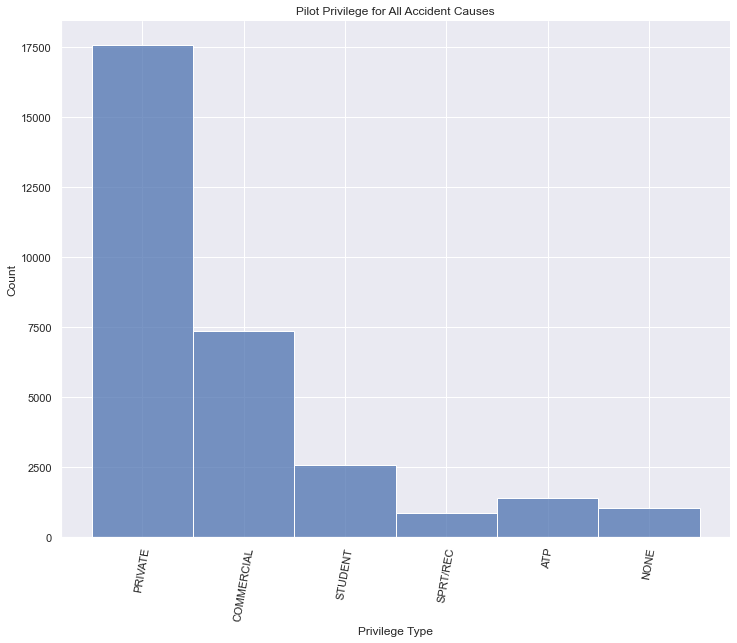

In [87]:

g = sns.displot(df, x='pilot_privileges', height=8, aspect = 1.3)
plt.xlabel('Privilege Type')
plt.title('Pilot Privilege for All Accident Causes')
g.set_xticklabels(rotation=80)
plt.show()

In [88]:
df_top1 = df[df.event_cause.isin(['Personnel-Aircraft control'])]
df_top1.shape

(4390, 115)

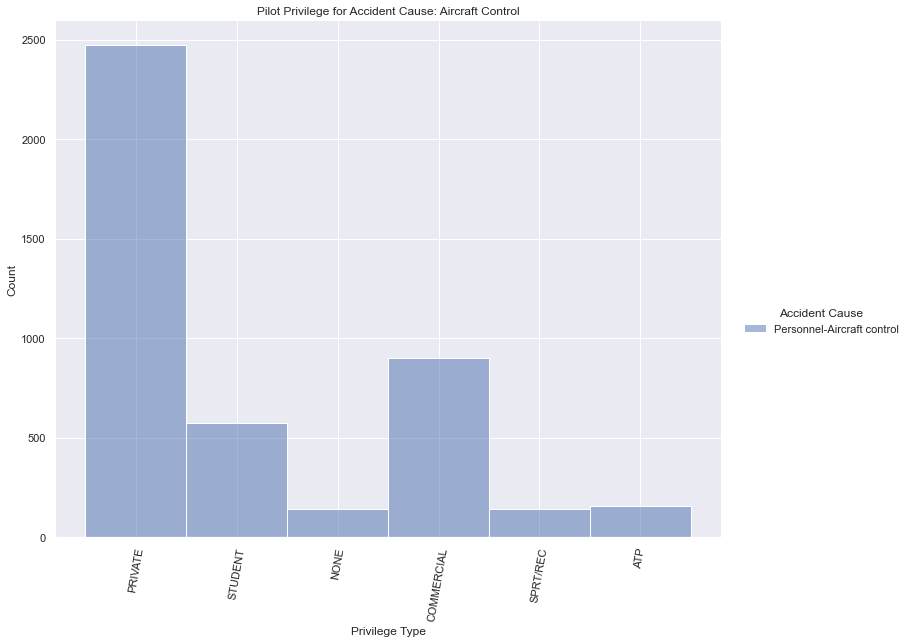

In [104]:
g = sns.displot(df_top1, x='pilot_privileges',  hue='event_cause', height=8, aspect = 1.3)
g._legend.set_title('Accident Cause')
plt.xlabel('Privilege Type')
plt.title('Pilot Privilege for Accident Cause: Aircraft Control')
g.set_xticklabels(rotation=80)
plt.show()

In [90]:
df.head()

,event_cause,Unnamed: 0,ev_id,ac_key,find_key,far_part,second_pilot,crew_category,crew_age,crew_sex,pilot_privileges,med_certf,med_crtf_vldty,ev_country,light_cond,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_FE,CERT_FORN,CERT_MIL,CERT_RMPT,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTR_GYRO,INSTR_HELI,INSTRUCT_IAIR,INSTR_IHEL,INSTR_PLFT,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,Personnel-Decision making/judgment,0,20001208X08803,20001208X088031,20001208X0880311,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Enviro-Ceiling/visibility/precip,1,20001208X08803,20001208X088031,20001208X0880312,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Enviro-Ceiling/visibility/precip,2,20001208X08803,20001208X088031,20001208X0880313,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aircraft oper/perf/capability-Altitude,3,20001208X08803,20001208X088031,20001208X0880314,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aircraft oper/perf/capability-(general),4,20001208X08803,20001208X088031,20001208X0880315,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Test proportions of accidents by pilot certificate privilage

In [91]:
def set_proportions(df, privilege, group_name):
    ''' calculate proportions of accidents by pilot certificate priviledge given accident cause or population'''
    n = len(df)
    df_inner = df[df['pilot_privileges']==privilege]
    num = len(df_inner)
    print(group_name + ' ' + privilege + ' proportion : ' + str(round(num/n,2)))

In [92]:
set_proportions(df, 'PRIVATE', 'Population')
set_proportions(df, 'COMMERCIAL', 'Population')
set_proportions(df, 'STUDENT', 'Population')
set_proportions(df, 'NONE', 'Population')
set_proportions(df, 'ATP', 'Population')
set_proportions(df, 'SPRT/REC', 'Population')

Population PRIVATE proportion : 0.57
Population COMMERCIAL proportion : 0.24
Population STUDENT proportion : 0.08
Population NONE proportion : 0.03
Population ATP proportion : 0.04
Population SPRT/REC proportion : 0.03


In [93]:
# filter causes with a minimum number of samples
min_sample = 20

causes = {}
cause_counts = df['event_cause'].value_counts().to_dict()
for k, val in cause_counts.items():
    #include only incidents with at least 75 data points
    if val >= min_sample: 
        causes[k] = val

# get the proportions of each pilot priviledge by cause
privilege = list(df['pilot_privileges'].unique())

#load dictionary with cause, cetificate priviledge, number of matches for certificare, total number of accidents due to cause
entries = {}
i=0
for c, val in causes.items():
    temp_df = df[df['event_cause'] == c]
    sample_size = len(temp_df)
     
    for p in privilege:
        p_df = temp_df[temp_df['pilot_privileges']==p]
        sample_success = len(p_df)
        entries[i] = [c, p, sample_success, sample_size]   
        i += 1

## Hypothesis Testing

#### Null Hypothesis - The proportion sudents involved in all accidents is equal to the proportion of students involved in a landing flare accident.
                                             Prop_sample = Prop_pop

#### Alternate Hypothesis - The proportion sudents involved in all accidents is not equal to the proportion of students involved in a landing flare accident.¶

                                             Prop_sample != Prop_pop
                                             
Alpha = 0.05                                             

In [94]:

#significance level
a = 0.05

#populate dataframe with info
prop_test = pd.DataFrame.from_dict(entries, orient='index')
prop_test.columns=['cause', 'privilege', 'sucess', 'sample_size']
prop_test[['hypothesis', 'z_stat', 'p_val']] = 0.0
prop_test['significance'] = ''
for i in range(len(prop_test)):
    if prop_test.iloc[i,1] ==  "COMMERCIAL":
        prop_test.iloc[i,4] = 0.24
    if prop_test.iloc[i,1] ==  "STUDENT":
        prop_test.iloc[i,4] = 0.08
    if prop_test.iloc[i,1] ==  "NONE":
        prop_test.iloc[i,4] = 0.03
    if prop_test.iloc[i,1] ==  "ATP":
        prop_test.iloc[i,4] = 0.04
    if prop_test.iloc[i,1] ==  "SPRT/REC":
        prop_test.iloc[i,4] = 0.03
    if prop_test.iloc[i,1] ==  "PRIVATE":
        prop_test.iloc[i,4] = 0.57    

        
# run 2-sided z test for proportion. test if the proportion for an accident given a pilot certificate priviledge is the 
# same as the proportion of accidents for that certifate on the population

    z, p  =  proportions_ztest(count=prop_test.iloc[i,2], nobs=prop_test.iloc[i,3],
                               value=prop_test.iloc[i,4], alternative = 'two-sided')
    prop_test.iloc[i,5] = round(z,4)
    prop_test.iloc[i,6] = round(p,4)
    
    if prop_test.iloc[i,6] > a:
        prop_test.iloc[i,7] = 'No Reject'
    else:
        prop_test.iloc[i,7] = 'Reject'
      

D:\Anaconda\envs\Capstone2\lib\site-packages\statsmodels\stats\weightstats.py:671: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff


In [95]:
prop_test

,cause,privilege,sucess,sample_size,hypothesis,z_stat,p_val,significance
0,Personnel-Aircraft control,PRIVATE,2472,4390,0.57,-0.9220,0.3565,No Reject
1,Personnel-Aircraft control,COMMERCIAL,902,4390,0.24,-5.6629,0.0000,Reject
2,Personnel-Aircraft control,STUDENT,574,4390,0.08,9.9744,0.0000,Reject
3,Personnel-Aircraft control,SPRT/REC,142,4390,0.03,0.8787,0.3796,No Reject
4,Personnel-Aircraft control,ATP,158,4390,0.04,-1.4261,0.1538,No Reject
5,Personnel-Aircraft control,NONE,142,4390,0.03,0.8787,0.3796,No Reject
6,Aircraft oper/perf/capability-Directional control,PRIVATE,1105,1873,0.57,1.7566,0.0790,No Reject
7,Aircraft oper/perf/capability-Directional control,COMMERCIAL,345,1873,0.24,-6.2301,0.0000,Reject
8,Aircraft oper/perf/capability-Directional control,STUDENT,268,1873,0.08,7.7971,0.0000,Reject
9,Aircraft oper/perf/capability-Directional control,SPRT/REC,39,1873,0.03,-2.7817,0.0054,Reject


In [96]:
rejected = prop_test[prop_test['significance'] == 'Reject']

print('There are ' + str(len(rejected)) + " instances out of " + str(len(prop_test)) + " where the sample proportion does not match the population proportion.")
    

There are 232 instances out of 702 where the sample proportion does not match the population proportion.


### Pilot Privilage Certificate may be a good feature to predict accident type

### INSTRUMENT AIRPLANE

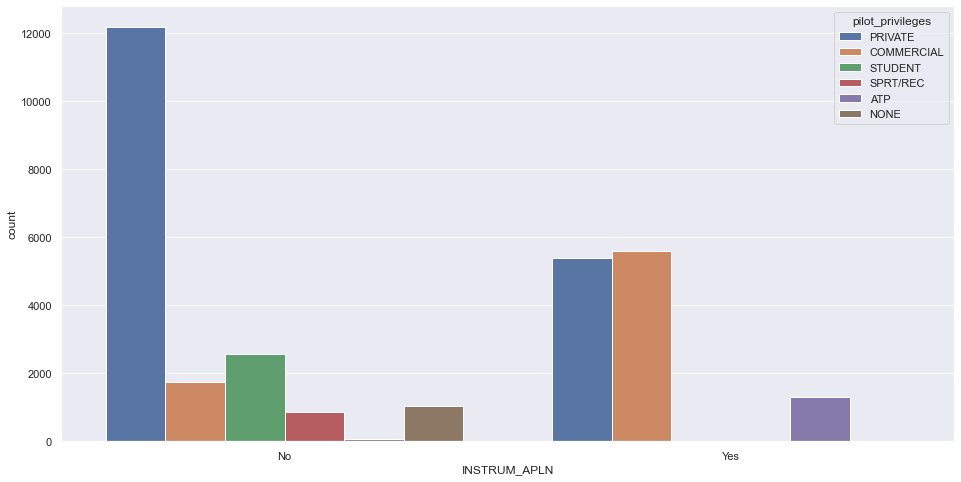

In [97]:
sns.countplot(x='INSTRUM_APLN', hue='pilot_privileges', data=df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

### There appears to be differences in proportion of accidents for pilots with and without intrument ratings.

### MULTI ENGINE LAND

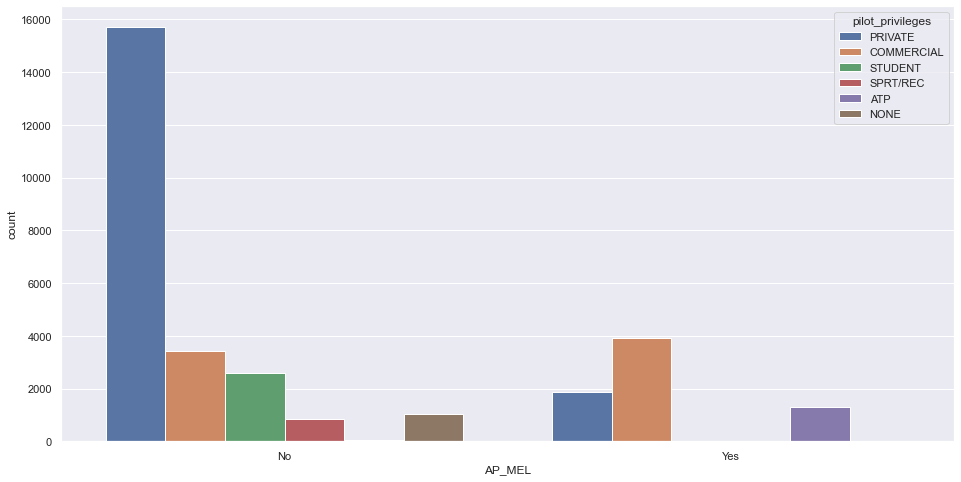

In [98]:
sns.countplot(x='AP_MEL', hue='pilot_privileges', data=df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

### There appears to be differences in proportion of accidents for pilots with and without Multi-Engile Land Ratings.

### AIRPLANE MULTI ENGINE SEA

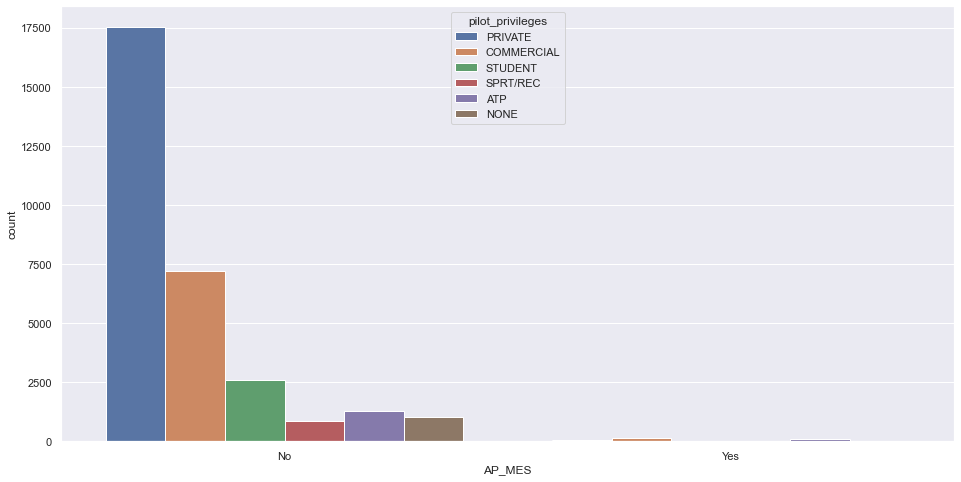

In [99]:
sns.countplot(x='AP_MES', hue='pilot_privileges', data=df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

### MES rating does not help in classification and will be dropped

### AIRPLANE SINGLE ENGINE SEA

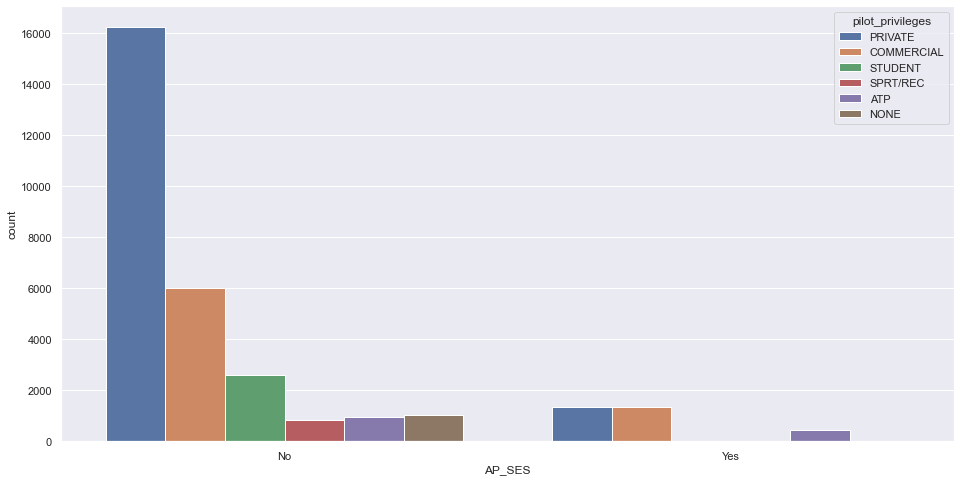

In [100]:
sns.countplot(x='AP_SES', hue='pilot_privileges', data=df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

### Airplane Single Engine sea may only have a marginal effect on classification.

### AIRPLANE SINGLE ENGINE Land

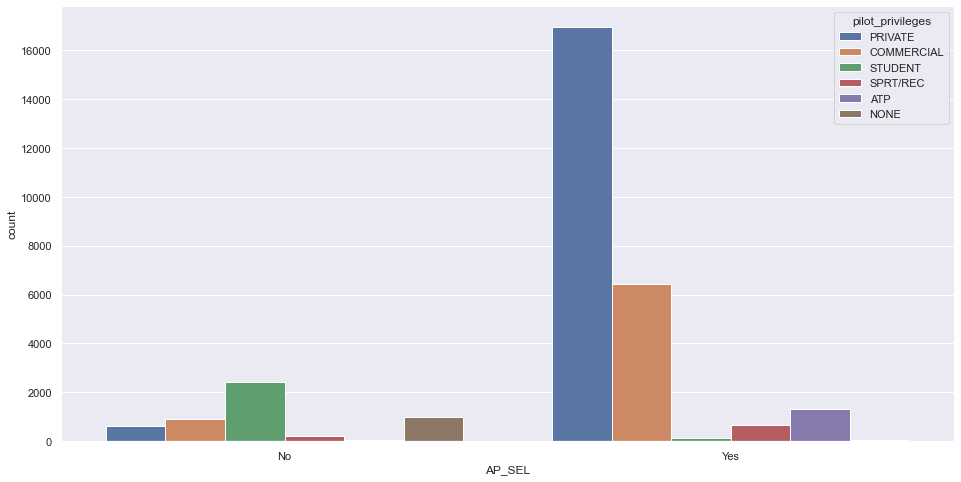

In [101]:
sns.countplot(x='AP_SEL', hue='pilot_privileges', data=df)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

### Airplane Single Engine land may only have a marginal effect on classification.

### Crew Sex

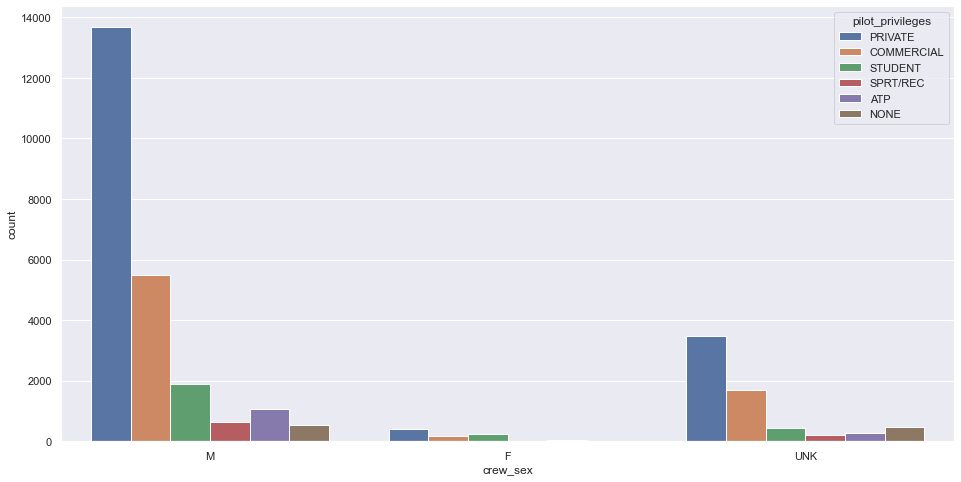

In [103]:
sns.countplot(x='crew_sex', hue='pilot_privileges', data=df)

plt.show()

#### Crew Sex has many unknows entries. Column wiill be dropped.

In [102]:
df.head()


,event_cause,Unnamed: 0,ev_id,ac_key,find_key,far_part,second_pilot,crew_category,crew_age,crew_sex,pilot_privileges,med_certf,med_crtf_vldty,ev_country,light_cond,wx_cond_basic,flt_plan_filed,type_fly,phase_flt_spec,CERT_FE,CERT_FORN,CERT_MIL,CERT_RMPT,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTR_GYRO,INSTR_HELI,INSTRUCT_IAIR,INSTR_IHEL,INSTR_PLFT,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_HELI,INSTRUM_PLFT,INSTRUM_NONE,OTHR_AIRS,OTHR_BALL,OTHR_GLI,OTHR_GYRO,OTHR_HELI,OTHR_PLFT,OTHR_SUAS,OTHR_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,INC-NO,LTA-INST,LTA-IRCV,LTA-L24H,LTA-L30D,LTA-L90D,LTA-PIC,LTA-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,REL-NO,ROTO-INST,ROTO-IRCV,ROTO-L24H,ROTO-L30D,ROTO-L90D,ROTO-PIC,ROTO-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-INST,SIMU-IRCV,SIMU-L24H,SIMU-L30D,SIMU-L90D,SIMU-PIC,SIMU-TOTL
0,Personnel-Decision making/judgment,0,20001208X08803,20001208X088031,20001208X0880311,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Enviro-Ceiling/visibility/precip,1,20001208X08803,20001208X088031,20001208X0880312,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Enviro-Ceiling/visibility/precip,2,20001208X08803,20001208X088031,20001208X0880313,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aircraft oper/perf/capability-Altitude,3,20001208X08803,20001208X088031,20001208X0880314,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aircraft oper/perf/capability-(general),4,20001208X08803,20001208X088031,20001208X0880315,91,N,PILOT,46,M,PRIVATE,CL3,UNK,USA,DAYL,IMC,NONE,PERS,Unknown,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0,1,0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,275.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
